# Prioritas 1

1. Set Environment dan Dataset:
    - Siapkan dataset penjualan dalam format CSV atau Excel.
    - Dataset harus mencakup informasi penting seperti tanggal, jumlah penjualan, harga, kategori produk, dan lainnya.
    - Buat file .env untuk menyimpan kredensial API OpenAI (misalnya, OPENAI_API_KEY).

2. Integrasi OpenAI API
    - Gunakan Python untuk membaca kredensial dari file .env.
    - Integrasikan OpenAI API dengan skrip Python Anda untuk menganalisis dataset penjualan.

3. Optimasi Prompt Engineering:
    - Kembangkan berbagai prompt yang dirancang untuk mendapatkan insight dari dataset penjualan menggunakan OpenAI API.
    - Fokuskan pada analisis tren penjualan, segmentasi pelanggan, dan prediksi penjualan.

4. Analisis dan Visualisasi Data:
    - Gunakan Pandas untuk analisis data awal dan visualisasi menggunakan Matplotlib atau Seaborn.
    - Bandingkan hasil analisis tradisional dengan insight yang diperoleh dari OpenAI API.

5. Dokumentasi Proses:
    - Dokumentasikan setiap langkah, mulai dari pengaturan lingkungan, pengolahan data, hingga analisis akhir.
    - Catat bagaimana penggunaan file .env dan OpenAI API mempengaruhi proses dan hasil analisis.

In [7]:
! pip install google-generativeai

  Using cached google_auth-2.29.0-py2.py3-none-any.whl.metadata (4.7 kB)
  Using cached proto_plus-1.23.0-py3-none-any.whl.metadata (2.2 kB)
  Using cached cachetools-5.3.3-py3-none-any.whl.metadata (5.3 kB)
  Using cached pyasn1_modules-0.4.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached rsa-4.9-py3-none-any.whl.metadata (4.2 kB)
  Using cached pyasn1-0.6.0-py2.py3-none-any.whl.metadata (8.3 kB)
INFO: pip is looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/146.8 kB ? eta -:--:--
   ---------------------------------------- 146.8/146.8 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/664.5 kB ? eta -:--:--
   --------------- ------------------------ 256.0/664.5 kB 1.6 MB/s eta 0:00:01
   ------------------- ------------------ 337.9/664.5 kB 955.3 kB/s eta 0:00:01
   ---------------------------- --------- 501.8/664.5 kB 786.4 k

In [29]:
import yaml
import google.generativeai as genai
import pandas as pd
import matplotlib.pyplot as plt

# Langkah 1: Baca kredensial API dari file .yml
with open('gemini_key.yml', 'r') as file:
    api_creds = yaml.safe_load(file)

GOOGLE_API_KEY = api_creds['gemini_key']

In [28]:
# Langkah 4: Membaca dataset penjualan
df = pd.read_csv('penjualan.csv')

**CSV-formatted list:**

```
date,sales_amount,price,product_category
2023-02-13,15.99,15.99,Fiction
2023-03-08,29.98,29.98,Non-Fiction
2023-04-12,18.99,18.99,Fiction
2023-05-10,24.99,24.99,Non-Fiction
2023-06-14,12.99,12.99,Fiction
2023-07-12,34.99,34.99,Non-Fiction
2023-08-16,21.99,21.99,Fiction
2023-09-14,28.99,28.99,Non-Fiction
2023-10-18,19.99,19.99,Fiction
2023-11-16,32.99,32.99,Non-Fiction
2023-12-20,23.99,23.99,Fiction
2024-01-14,30.99,30.99,Non-Fiction
2024-02-18,20.99,20.99,Fiction
2024-03-16,27.99,27.99,Non-Fiction
2024-04-20,17.99,17.99,Fiction
2024-05-18,33.99,33.99,Non-Fiction
2024-06-22,22.99,22.99,Fiction
2024-07-20,26.99,26.99,Non-Fiction
2024-08-24,16.99,16.99,Fiction
2024-09-22,31.99,31.99,Non-Fiction
2024-10-26,25.99,25.99,Fiction
2024-11-24,24.99,24.99,Non-Fiction
2024-12-28,14.99,14.99,Fiction
2025-01-22,36.99,36.99,Non-Fiction
2025-02-26,27.99,27.99,Fiction
2025-03-30,19.99,19.99,Non-Fiction
2025-04-28,23.99,23.99,Fiction
2025-05-26,35.99,35.99,Non-Fiction
2025-0

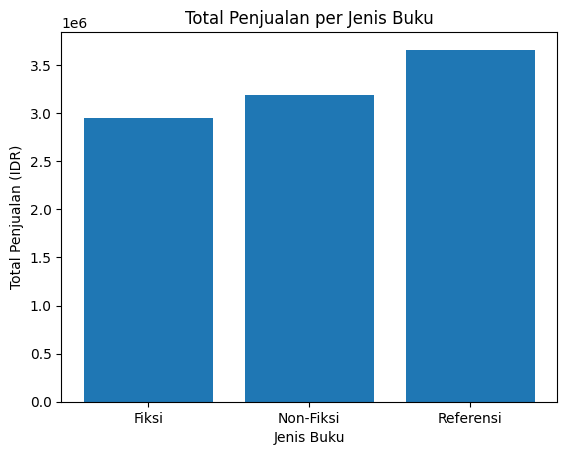

In [30]:
# Langkah 2: Konfigurasi API Gemini
genai.configure(api_key=GOOGLE_API_KEY)
model = genai.GenerativeModel('gemini-pro')

# Langkah 3: Menghasilkan konten berdasarkan permintaan
response = model.generate_content("Generate a CSV-formatted list consisting of 50 entries containing date, sales_amount, price, and product_category for each book sale transaction. Ensure that each attribute is properly separated by commas and each entry is on a new line. Afterwards, perform an analysis to determine the total sales_amount for each book category.")
print(response.text)

# Langkah 5: Analisis dan Visualisasi Data
print(df.head())

# Langkah 6: Visualisasi data
sales_amount_by_category = df.groupby(['Jenis Buku']).sum()['Harga (IDR)']
product_categories = sales_amount_by_category.index.to_list()
total_sales_amount = sales_amount_by_category.values

plt.bar(product_categories, total_sales_amount)
plt.xlabel("Jenis Buku")
plt.ylabel("Total Penjualan (IDR)")
plt.title("Total Penjualan per Jenis Buku")
plt.show()